<a href="https://colab.research.google.com/github/nitrogenlab/GP15_watermassanalysis/blob/main/pyompa_dev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gsw

In [2]:
import gsw

In [3]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Gla6o_YihOCfU5pWGLhFvL-TKm_0aXfQ' -O names_added_GP15OMPA_33RR20180918_only_gs_rosette_clean1_hy1.csv

--2021-07-15 16:55:23--  https://docs.google.com/uc?export=download&id=1Gla6o_YihOCfU5pWGLhFvL-TKm_0aXfQ
Resolving docs.google.com (docs.google.com)... 74.125.202.138, 74.125.202.113, 74.125.202.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.202.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0s-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/17u99s5hp1f6ppd5bcbc4m9650devje5/1626368100000/06203730782251856755/*/1Gla6o_YihOCfU5pWGLhFvL-TKm_0aXfQ?e=download [following]
--2021-07-15 16:55:24--  https://doc-0s-a4-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/17u99s5hp1f6ppd5bcbc4m9650devje5/1626368100000/06203730782251856755/*/1Gla6o_YihOCfU5pWGLhFvL-TKm_0aXfQ?e=download
Resolving doc-0s-a4-docs.googleusercontent.com (doc-0s-a4-docs.googleusercontent.com)... 142.250.125.132, 2607:f8b0:4001:c2f::84
Connecting to doc-0s-a4-docs.googleusercontent.com (doc-0s-a4-

In [4]:
!pip uninstall -y pyompa
%cd /content/
!rm -rf pyompa
!git clone https://github.com/nitrogenlab/pyompa
%cd /content/pyompa
!git checkout dev
!git log -1
!pip install .
%cd /content/

%reload_ext autoreload
%autoreload 2
from importlib import reload
import pyompa
reload(pyompa)

Uninstalling pyompa-0.4.0.0:
  Successfully uninstalled pyompa-0.4.0.0
/content
Cloning into 'pyompa'...
remote: Enumerating objects: 978, done.
remote: Counting objects: 100% (286/286), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 978 (delta 189), reused 163 (delta 87), pack-reused 692
Receiving objects: 100% (978/978), 14.89 MiB | 24.63 MiB/s, done.
Resolving deltas: 100% (675/675), done.
/content/pyompa
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'
commit b326feaeabd69e0ff2d5c549e1c1edca5f2fbfb4 (HEAD -> dev, origin/dev)
Author: Av Shrikumar <avanti.shrikumar@gmail.com>
Date:   Wed Jul 14 22:32:16 2021 -0700

    csv export function for thermocline array soln
Processing /content/pyompa
  Created wheel for pyompa: filename=pyompa-0.4.0.0-cp37-none-any.whl size=26213 sha256=bb99c030dbd92867d4e43394e8d9f1fadd5653b2ced6f3f4204743c7e6452f25
  Stored in directory: /tmp/pip-ephem-wheel-cache-g8pamef6/wheels/c8/e7/18

<module 'pyompa' from '/usr/local/lib/python3.7/dist-packages/pyompa/__init__.py'>

In [5]:
%reload_ext autoreload
%autoreload 2
from importlib import reload
import pyompa
reload(pyompa)

<module 'pyompa' from '/usr/local/lib/python3.7/dist-packages/pyompa/__init__.py'>

In [6]:
import pandas as pd
import numpy as np

def augment_df_with_PO_NO_SiO(df):  
    #remineralization ratios
    r_PO = 155;
    r_SiO = 15
    r_NO = 9.68
    df["PO"] = df["oxygen"] + df["phosphate"]*r_PO
    df["NO"] = df["oxygen"] + df["nitrate"]*r_NO
    df["SiO"] = df["oxygen"] + df["silicate"]*r_SiO
    return df

header = ["c"+str(i) for i in range(1,30)]
header[4] = "bottle flag"
header[16] = "bottle salinity flag"
header[20] = "bottle oxygen flag"
header[22] = "silicate flag"
header[24] = "nitrate flag"
header[28] = "phosphate flag"

header[11] = "CTD pressure"
header[12] = "CTD temperature"
header[15] = "practical_salinity" #practical salinity
header[8] = "lat"
header[9] = "lon"

header[0] = "stnnbr"
header[5] = "geotrc_ID"
header[10] = "bottom depth"
header[19] = "oxygen"
header[21] = "silicate"
header[23] = "nitrate"
header[27] = "phosphate"

gp15_df = pd.read_csv("names_added_GP15OMPA_33RR20180918_only_gs_rosette_clean1_hy1.csv",
                      names=header, na_values = -999)

#remove bad data
for flag_type in ["bottle flag", "bottle salinity flag", "bottle oxygen flag",
                  "silicate flag", "nitrate flag", "phosphate flag"]:
    gp15_df = gp15_df[gp15_df[flag_type] <= 2]
gp15_df = pd.DataFrame(gp15_df)

#create PO offset
#gp15_df["phosphate"] = gp15_df["phosphate"] - 0.2

#add PO and NO to data frame
augment_df_with_PO_NO_SiO(gp15_df)

absolute_salinity = gsw.SA_from_SP(SP=gp15_df["practical_salinity"],
                                   p=gp15_df["CTD pressure"],
                                   lon=gp15_df["lon"],
                                   lat=gp15_df["lat"])
gp15_df["absolute_salinity"] = absolute_salinity

conservative_temp = gsw.CT_from_t(SA=absolute_salinity,
                                  t=gp15_df["CTD temperature"],
                                  p=gp15_df["CTD pressure"])
gp15_df["conservative_temp"] = conservative_temp

potential_temp = gsw.pt_from_CT(SA=absolute_salinity,
                                CT=conservative_temp)
gp15_df["potential_temp"] = potential_temp

sig0 = gsw.rho(SA=absolute_salinity, CT=conservative_temp, p=0) - 1000
gp15_df["sigma0"] = sig0

z = gsw.z_from_p(p=gp15_df["CTD pressure"], lat=gp15_df["lat"])
depth = -z #https://github.com/TEOS-10/python-gsw/blob/7d6ebe8114c5d8b4a64268d36100a70e226afaf6/gsw/gibbs/conversions.py#L577
gp15_df["Depth"] = depth

spic0 = gsw.spiciness0(SA=absolute_salinity, CT=conservative_temp)
gp15_df["spiciness"] = spic0

#calculation of planetary vorticity
rho_ref = 1000.0 #reference density
Omega = 2*np.pi/86400;
f = np.mean(2*Omega*np.sin(gp15_df["lat"]*(np.pi/180.0)))
PV = -(f/rho_ref)*(np.gradient(sig0, depth))
gp15_df["PV"] = PV #potential vorticity

print("Rows:",len(gp15_df))
gp15_df = gp15_df.dropna()
print("Rows without NA values:",len(gp15_df))

Rows: 940
Rows without NA values: 926


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1072: RuntimeWarning: divide by zero encountered in true_divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1073: RuntimeWarning: divide by zero encountered in true_divide
  b = (dx2 - dx1) / (dx1 * dx2)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1074: RuntimeWarning: divide by zero encountered in true_divide
  c = dx1 / (dx2 * (dx1 + dx2))
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:1080: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]


In [7]:
gp15_df

,stnnbr,c2,c3,c4,bottle flag,geotrc_ID,c7,c8,lat,lon,bottom depth,CTD pressure,CTD temperature,c14,c15,practical_salinity,bottle salinity flag,c18,c19,oxygen,bottle oxygen flag,silicate,silicate flag,nitrate,nitrate flag,c26,c27,phosphate,phosphate flag,PO,NO,SiO,absolute_salinity,conservative_temp,potential_temp,sigma0,Depth,spiciness,PV
0,1.0,3,36,36,2,12443,20180926,1231,56.0585,-156.9628,94,2.5,10.6292,31.4078,2,31.4134,2,279.1,3,285.90,2,7.24,2,2.04,2,0.16,2,0.43,2,352.55,305.6472,394.50,31.563603,10.686987,10.628914,24.052467,2.477227,-1.235624,-6.847071e-10
2,1.0,3,24,24,2,12445,20180926,1231,56.0585,-156.9628,94,31.0,9.8355,31.8648,2,31.8602,2,257.8,2,258.06,2,10.76,2,7.16,2,0.46,2,0.81,2,383.61,327.3688,419.46,32.013385,9.878690,9.832110,24.533620,30.715490,-1.050415,-7.829064e-10
3,1.0,3,18,18,2,12446,20180926,1231,56.0585,-156.9628,94,41.1,8.7200,31.8890,2,31.8970,2,246.3,2,251.60,2,11.64,2,9.61,2,0.23,2,0.97,2,401.95,344.6248,426.20,32.050711,8.757671,8.715846,24.737235,40.721797,-1.209639,-7.433318e-10
4,1.0,3,13,13,2,12447,20180926,1231,56.0585,-156.9628,94,50.6,8.6651,32.0857,2,32.0871,2,241.7,2,245.43,2,14.08,2,11.06,2,0.23,2,1.07,2,411.28,352.4908,456.63,32.242302,8.698515,8.659988,24.894944,50.133222,-1.080744,-6.155510e-10
5,1.0,3,7,7,2,12448,20180926,1231,56.0585,-156.9628,94,71.3,7.3362,32.1507,2,32.1618,2,240.1,2,243.16,2,16.04,2,13.74,2,0.07,2,1.22,2,432.26,376.1632,483.76,32.318352,7.362774,7.329704,25.144753,70.638720,-1.230846,-3.744648e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,39.0,12,16,17,2,15844,20181123,1259,-20.0000,-151.9991,4336,3041.0,1.6731,34.6727,2,34.6730,2,162.2,2,163.72,2,122.79,2,34.80,2,0.00,2,2.35,2,527.97,500.5840,2005.57,34.847213,1.448263,1.448150,27.760561,3000.792840,-0.117884,-2.062249e-12
1138,39.0,12,13,14,2,15845,20181123,1259,-20.0000,-151.9991,4336,3450.0,1.5608,34.6829,2,34.6834,2,167.8,2,168.82,2,124.25,2,34.25,2,0.00,2,2.34,2,531.52,500.3600,2032.57,34.857594,1.297902,1.297724,27.779610,3401.198658,-0.122707,-1.730980e-12
1139,39.0,12,10,11,2,15846,20181123,1259,-20.0000,-151.9991,4336,3860.1,1.4595,34.6909,2,34.6905,2,176.6,2,177.05,2,122.20,2,33.63,2,0.00,2,2.32,2,536.65,502.5884,2010.05,34.864597,1.156410,1.156150,27.795069,3801.952551,-0.128901,-1.164123e-12
1140,39.0,12,7,8,2,15847,20181123,1259,-20.0000,-151.9991,4336,4173.4,1.4391,34.6940,2,34.6942,2,179.1,3,181.23,2,121.13,2,33.35,2,0.00,2,2.31,2,539.28,504.0580,1998.18,34.868249,1.102392,1.102104,27.801685,4107.626461,-0.130510,-6.648035e-13


In [8]:
!wget https://github.com/nitrogenlab/GP15_watermassanalysis/raw/main/GP15_intermediateanddeep_endmemberswithsubtypes.csv -O GP15_intermediateanddeep_endmemberswithsubtypes.csv

--2021-07-15 16:55:33--  https://github.com/nitrogenlab/GP15_watermassanalysis/raw/main/GP15_intermediateanddeep_endmemberswithsubtypes.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/GP15_intermediateanddeep_endmemberswithsubtypes.csv [following]
--2021-07-15 16:55:34--  https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/GP15_intermediateanddeep_endmemberswithsubtypes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2593 (2.5K) [text/plain]
Saving to: ‘GP15_intermediateanddeep_endmemberswithsubtypes.csv’

GP15_intermediatean 

In [9]:
import pandas
endmember_df = pandas.read_csv("GP15_intermediateanddeep_endmemberswithsubtypes.csv")

#additional_rows = pandas.DataFrame(
#    {"watermass_name": ["PSUW", "ESSW"],
#     "conservative_temp": [4.03, 12.2],
#     "absolute_salinity": [33.38, 34.86],
#     "oxygen": [174.7, 84.6],
#     "phosphate": [1.87, 3.03],
#     "silicate": [21.58, 168.87],
#     "nitrate": [25.87, 43.5]
#    }
#)
endmember_df = augment_df_with_PO_NO_SiO(endmember_df)

In [10]:
endmember_df

,watermass_name,conservative_temp,absolute_salinity,silicate,nitrate,phosphate,oxygen,latitude,longitude,PO,NO,SiO
0,AABW_0,-0.246976,34.813705,120.575318,32.083772,2.219509,233.674298,-64.606559,34.240678,577.698256,544.245206,2042.304061
1,AAIW_0,4.446683,34.407787,20.495798,28.550239,1.997939,231.053341,-50.359275,-88.680001,540.733816,507.419652,538.490310
2,AAIW_1,5.031174,34.384525,11.560925,24.041434,1.671867,272.202930,-53.514262,-84.722780,531.342382,504.924013,445.616811
3,ENPCW_0,16.451764,34.875335,4.713155,4.618615,0.409037,204.266147,24.042267,-159.347316,267.666948,248.974338,274.963477
4,EqPW_0,6.971582,34.770953,58.428949,41.981151,3.061366,14.374752,2.076588,-86.007478,488.886466,420.752294,890.808993
5,EqPW_1,14.870830,35.182124,17.188244,25.340561,1.822177,57.199400,-0.143255,-85.836391,339.636761,302.496034,315.023065
6,LCDW_0,0.680998,34.876825,117.574896,32.074881,2.219291,206.468561,-65.582464,2.717579,550.458679,516.953412,1970.092000
7,LCDW_1,1.508063,34.899924,96.917255,31.126569,2.178134,192.223272,-65.670475,-1.963798,529.834001,493.528460,1645.982098
8,NPIW_0,9.087524,34.446507,44.627649,24.435212,1.748434,138.491555,35.070386,142.394251,409.498802,375.024406,807.906297
9,NPIW_1,3.162491,34.547336,132.037585,42.164345,3.033844,41.531905,36.868343,145.503587,511.777680,449.682766,2022.095673


In [11]:
from collections import OrderedDict

intermediateanddeep_settingtosoln = OrderedDict()

In [12]:
gp15_df.columns

Index(['stnnbr', 'c2', 'c3', 'c4', 'bottle flag', 'geotrc_ID', 'c7', 'c8',
       'lat', 'lon', 'bottom depth', 'CTD pressure', 'CTD temperature', 'c14',
       'c15', 'practical_salinity', 'bottle salinity flag', 'c18', 'c19',
       'oxygen', 'bottle oxygen flag', 'silicate', 'silicate flag', 'nitrate',
       'nitrate flag', 'c26', 'c27', 'phosphate', 'phosphate flag', 'PO', 'NO',
       'SiO', 'absolute_salinity', 'conservative_temp', 'potential_temp',
       'sigma0', 'Depth', 'spiciness', 'PV'],
      dtype='object')

In [13]:
gp15_df.apply(lambda x: x['stnnbr'], axis=1)

0        1.0
2        1.0
3        1.0
4        1.0
5        1.0
        ... 
1137    39.0
1138    39.0
1139    39.0
1140    39.0
1141    39.0
Length: 926, dtype: float64

In endmember file, lowered number of archetypes to three max for all water masses and reduced to following for literature:
Up to 3 PDW talley
Up to 2 AAIW
Up to 2 EqW

Below added upper potential density penalty of 27 for LCDW and UCDW

Potential change:
Combine LCDW and AABW? Talley 2011

In [14]:
import pyompa
reload(pyompa)
from pyompa import OMPAProblem, EndMemExpPenaltyFunc
from collections import OrderedDict
import json

#gp15_intermediateanddeep = pd.DataFrame(gp15_df[(gp15_df["sigma0"] >= 26.6)])
!wget https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/station_to_tc_cutoffs.json -O station_to_tc_cutoffs.json 
station_to_tcstartend = json.loads(open("station_to_tc_cutoffs.json").read())
gp15_intermediateanddeep = gp15_df[
    gp15_df.apply(lambda x: x['Depth'] > station_to_tcstartend[str(int(x['stnnbr']))]['depth_cutoffs'][1], axis=1)]

convertedparamgroups_staticremineralization = [
    pyompa.ConvertedParamGroup(
        groupname="phosphate_remin",
        conversion_ratios=[{"oxygen": -155, "phosphate": 1.0, "nitrate": 16.0}],
        always_positive=False)
]

convertedparamgroups_flexibleremineralization = [
    pyompa.ConvertedParamGroup(
        groupname="phosphate_remin",
        conversion_ratios=[#Representing C:P = 66
                           {"oxygen": -155*(66.0/106.0),
                            "phosphate": 1.0,
                            "nitrate": 16.0*(66.0/106.0)},
                           #Representing C:P = 209
                           {"oxygen": -155*(209.0/106.0),
                            "phosphate": 1.0,
                            "nitrate": 16.0*(209.0/106.0)}
                          ],
        always_positive=False)
]

rian_weighting = {
    "conservative_temp": 56.0,
    "absolute_salinity": 80.0,
    "silicate": 3.0,
    "nitrate": 5.0,
    "phosphate": 5.0,
    "oxygen": 1.0,
    "NO": 1.0,
    "PO": 0.5
}

withconversion_paramnames = ["conservative_temp", "absolute_salinity",
                             "silicate", "nitrate", "phosphate", "oxygen"]
noconversion_paramnames = ["conservative_temp", "absolute_salinity",
                           "silicate", "NO", "PO"]  

flexiblereminratio_settings = {
    "param_names": withconversion_paramnames,
    "param_weightings": rian_weighting,
    "convertedparam_groups": convertedparamgroups_flexibleremineralization}

staticreminratio_settings = {
    "param_names": withconversion_paramnames,
    "param_weightings": rian_weighting,
    "convertedparam_groups": convertedparamgroups_staticremineralization}

noremin_settings = {
    "param_names": noconversion_paramnames,
    "param_weightings": rian_weighting,
    "convertedparam_groups": []}

endmember_usagepenalty = { 
    "ENPCW_0": EndMemExpPenaltyFunc(
        spec={
            'sigma0':{'type':'density_default', 'upperbound':27.0},
            'lat': {'type':'latlon_default', 'lowerbound':0}
            }),

    "PSUW_0": EndMemExpPenaltyFunc(
        spec={'lat': {'type':'latlon_default', 'lowerbound':10}}),

    "EqPW_0": EndMemExpPenaltyFunc(
        spec={'lat': {'type':'latlon_default', 'upperbound':20}}),
    "EqPW_1": EndMemExpPenaltyFunc(
        spec={'lat': {'type':'latlon_default', 'upperbound':20}}),
    
    "LCDW_0": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.7}}),
    "LCDW_1": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.7}}),

    "AAIW_0": EndMemExpPenaltyFunc(
        spec={'lat': {'type':'latlon_default', 'upperbound':10}}),
    "AAIW_1": EndMemExpPenaltyFunc(
        spec={'lat': {'type':'latlon_default', 'upperbound':10}}),
    
    "UCDW_0": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.3}}),
    
    "AABW_0": EndMemExpPenaltyFunc(
        spec={'sigma0': {'type':'density_default', 'lowerbound':27.8},
              'lat': {'type': 'latlon_default', 'upperbound': 30} }),
}

#endmember_usagepenalty_onearchetype = {
#    "ENPCW_0": EndMemExpPenaltyFunc(
#        spec={'lat': {'type':'latlon_default', 'lowerbound':0}}),
#    "PSUW_0": EndMemExpPenaltyFunc(
#        spec={'lat': {'type':'latlon_default', 'lowerbound':10}}),
#    "EqPW_0": EndMemExpPenaltyFunc(
#        spec={'lat': {'type':'latlon_default', 'upperbound':15}}),
#    "LCDW_0": EndMemExpPenaltyFunc(
#        spec={'sigma0': {'type':'density_default', 'lowerbound':27.7}}),
#    #"LCDW_0": EndMemExpPenaltyFunc(
#        #spec={'lat': {'type':'latlon_default', 'upperbound':0}}),
#    "AAIW_0": EndMemExpPenaltyFunc(
#        spec={'lat': {'type':'latlon_default', 'upperbound':20}}),
#    #"UCDW_0": EndMemExpPenaltyFunc(
#        #spec={'lat': {'type':'latlon_default', 'upperbound':20}}),
#    "UCDW_0": EndMemExpPenaltyFunc(
#        spec={'sigma0': {'type':'density_default', 'lowerbound':27.3}}),
#    "AABW_0": EndMemExpPenaltyFunc(
#        spec={'sigma0': {'type':'density_default', 'lowerbound':27.8}}),
#}


for setting_name, setting, endmember_df_touse, usagepenalty_touse in [
    ("flexiblereminratio_manyarchetypes", flexiblereminratio_settings, endmember_df, endmember_usagepenalty),
    
                              #("staticreminratio", staticreminratio_settings),
                              #("noremin_settings", noremin_settings)
                              ]:
    print("On setting:", setting_name)
    ompa_soln = OMPAProblem(
              obs_df=gp15_intermediateanddeep,
              endmembername_to_usagepenaltyfunc=usagepenalty_touse,
              **setting).solve(
                  endmember_df_touse,
                  endmember_name_column="watermass_name",
                  batch_size=100)
    intermediateanddeep_settingtosoln[setting_name] = ompa_soln

--2021-07-15 16:55:34--  https://raw.githubusercontent.com/nitrogenlab/GP15_watermassanalysis/main/station_to_tc_cutoffs.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13389 (13K) [text/plain]
Saving to: ‘station_to_tc_cutoffs.json’

station_to_tc_cutof 100%[===================>]  13.08K  --.-KB/s    in 0s      

2021-07-15 16:55:34 (83.5 MB/s) - ‘station_to_tc_cutoffs.json’ saved [13389/13389]

On setting: flexiblereminratio_manyarchetypes
Adding penalty for ENPCW_0
Adding penalty for PSUW_0
Adding penalty for EqPW_0
Adding penalty for EqPW_1
Adding penalty for LCDW_0
Adding penalty for LCDW_1
Adding penalty for AAIW_0
Adding penalty for AAIW_1
Adding penalty for UCDW_0
Adding penalty for AABW_0
Endmember-idx mapping is
 OrderedDict([('AABW', [0]), ('

Plotting endmember fractions
Setting: flexiblereminratio_manyarchetypes


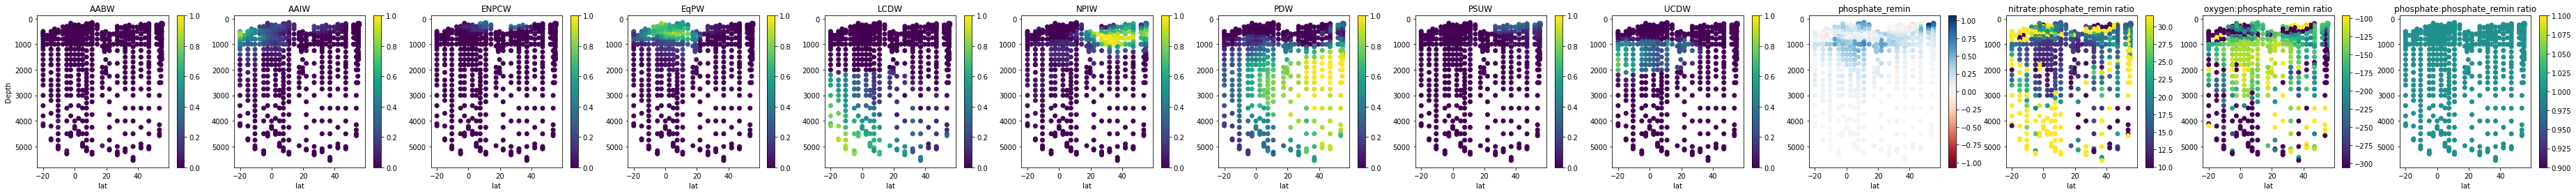

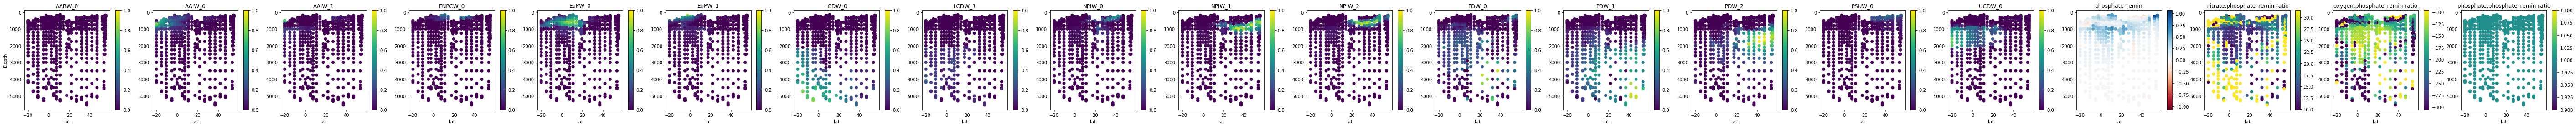

Plotting absolute residuals
Setting: flexiblereminratio_manyarchetypes


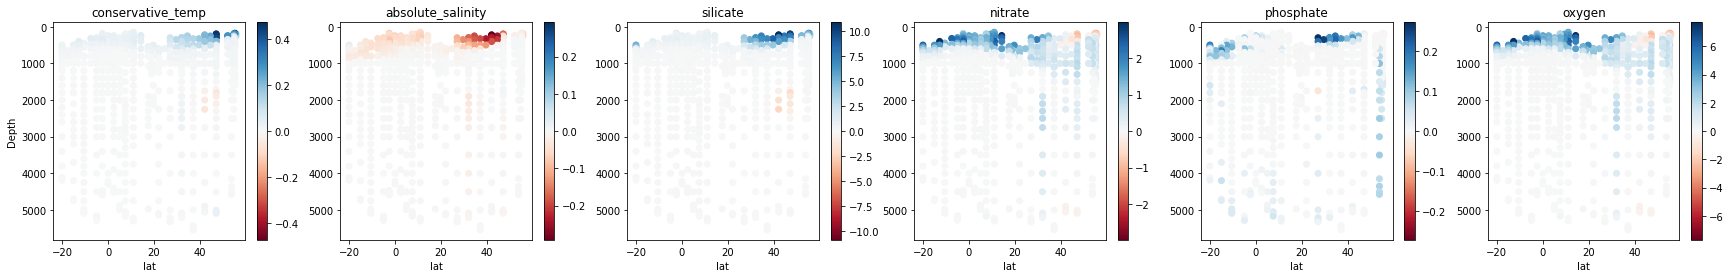

Plotting penalties
Setting: flexiblereminratio_manyarchetypes


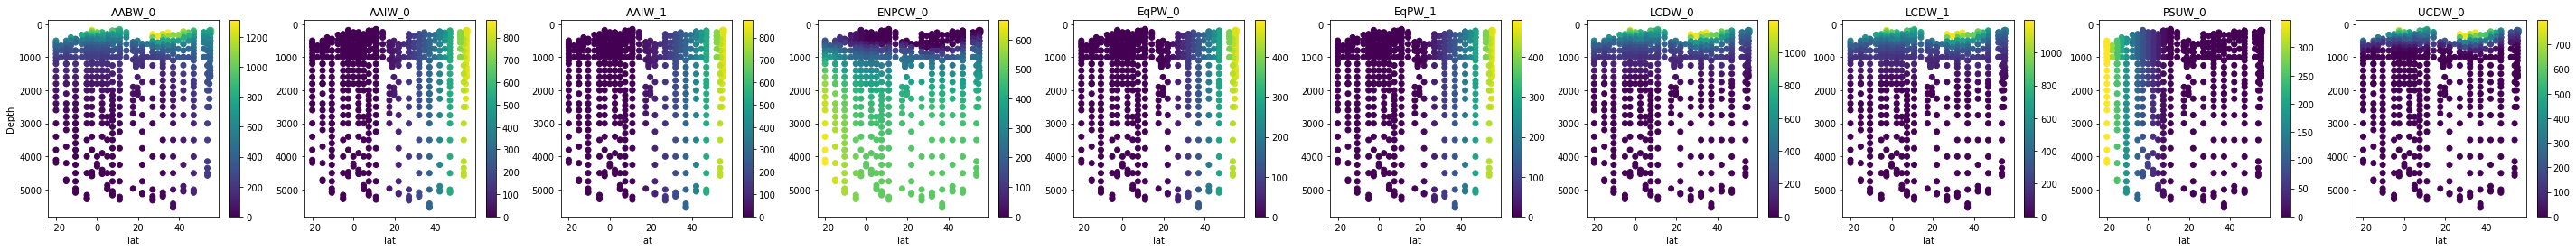

In [15]:
import numpy as np
from matplotlib import pyplot as plt
reload(pyompa)
from pyompa import (plot_ompasoln_endmember_fractions,                       
                    plot_ompasoln_residuals,                                 
                    plot_ompasoln_endmember_usagepenalties)


print("Plotting endmember fractions")
for setting in intermediateanddeep_settingtosoln:
    print("Setting:", setting)
    ompa_soln = intermediateanddeep_settingtosoln[setting]
    plot_ompasoln_endmember_fractions(ompa_soln=ompa_soln,
                                      xaxis_colname="lat",
                                      yaxis_colname="Depth",
                                      group_endmembers=True)
    plot_ompasoln_endmember_fractions(ompa_soln=ompa_soln,
                                      xaxis_colname="lat",
                                      yaxis_colname="Depth",
                                      group_endmembers=False)


print("Plotting absolute residuals")
for setting in intermediateanddeep_settingtosoln:
    print("Setting:", setting)
    ompa_soln = intermediateanddeep_settingtosoln[setting]
    plot_ompasoln_residuals(ompa_soln=ompa_soln,
                            xaxis_colname="lat",
                            yaxis_colname="Depth")
    
print("Plotting penalties")
for setting in intermediateanddeep_settingtosoln:
    print("Setting:", setting)
    ompa_soln = intermediateanddeep_settingtosoln[setting]
    plot_ompasoln_endmember_usagepenalties(ompa_soln=ompa_soln,
                            xaxis_colname="lat",
                            yaxis_colname="Depth")

In [16]:
#quantify variation in min/max for each endmember and the remineralization amount
from mpl_toolkits.axes_grid1 import make_axes_locatable
reload(pyompa)
from pyompa.util import collapse_endmembers_by_idxmapping, organize_converted_vars_by_groupname
from pyompa.plotting import plot_residuals, plot_endmember_fractions

soln = intermediateanddeep_settingtosoln["flexiblereminratio_manyarchetypes"]
#soln = intermediateanddeep_settingtosoln["flexiblereminratio_onearchetype"]

#max_resids = np.array([0.01, 0.04, 4, 1, 0.15, 2])
max_resids = np.array([0.001, 0.004, 0.4, 0.1, 0.015, 0.2])

for endmemberoverallidx, (endmembername, endmember_idxs) in enumerate(soln.endmembername_to_indices.items()):
    if (True):#endmembername in ["ESSW"]):
        maximizing_obj = np.zeros((len(soln.endmember_names) + soln.ompa_problem.num_converted_variables,))
        maximizing_obj[endmember_idxs] = -1
        
        (new_emfracs_max, perobs_convertedvars_max, maxwm, new_resids_max) = pyompa.ompacore.OMPASoln.core_quantify_ambiguity_via_residual_limits(
                                      self=soln, obj_weights=maximizing_obj,
                                      max_resids=max_resids)

        (groupname_to_totalconvertedvariable_max,                                   
         groupname_to_effectiveconversionratios_max) = (
            organize_converted_vars_by_groupname(
                converted_variables=perobs_convertedvars_max,
                convertedparam_groups=soln.ompa_problem.convertedparam_groups))
        
        minimizing_obj = np.zeros((len(soln.endmember_names) + soln.ompa_problem.num_converted_variables,))
        minimizing_obj[endmember_idxs] = 1
        (new_emfracs_min, perobs_convertedvars_min, minwm, new_resids_min) = pyompa.ompacore.OMPASoln.core_quantify_ambiguity_via_residual_limits(
                                      self=soln, obj_weights=minimizing_obj, max_resids=max_resids)

        (groupname_to_totalconvertedvariable_min,                                   
         groupname_to_effectiveconversionratios_min) = (
            organize_converted_vars_by_groupname(
                converted_variables=perobs_convertedvars_min,
                convertedparam_groups=soln.ompa_problem.convertedparam_groups))
        
        collapsed_fractions = collapse_endmembers_by_idxmapping(soln.endmember_fractions,
                                                                soln.endmembername_to_indices)
        print(endmembername)
        
        """print("original")
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,5))
        origscatter = ax[0].scatter(soln.obs_df["lat"], -soln.obs_df["Depth"],
                                    c=collapsed_fractions[:,endmemberoverallidx],
                                    vmin=0, vmax=1.0)
        divider = make_axes_locatable(ax[0])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        plt.colorbar(origscatter, cax=cax)
        ax[0].set_title("Original")
        ax[0].set_ylabel("-Depth")

        lowerscatter = ax[1].scatter(soln.obs_df["lat"], -soln.obs_df["Depth"],
                       c=minwm, #- collapsed_fractions[:,endmemberoverallidx]
                       vmin=0, vmax=1.0)
        divider = make_axes_locatable(ax[1])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        plt.colorbar(lowerscatter, cax=cax)
        ax[1].set_title("Lowerbound")

        upperscatter = ax[2].scatter(soln.obs_df["lat"], -soln.obs_df["Depth"],
                               c=-maxwm, #- collapsed_fractions[:,endmemberoverallidx]
                               vmin=0, vmax=1.0)
        divider = make_axes_locatable(ax[2])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        plt.colorbar(upperscatter, cax=cax)
        ax[2].set_title("Upperbound")

        plt.show()"""

        print("Original")
        plot_ompasoln_endmember_fractions(ompa_soln=ompa_soln,
                                      xaxis_colname="lat",
                                      yaxis_colname="Depth",
                                      group_endmembers=True)
                
        print("With min fractions")
        plot_endmember_fractions(
            endmember_fractions=pyompa.util.collapse_endmembers_by_idxmapping(
                endmember_fractions=new_emfracs_min,
                endmembername_to_indices=soln.endmembername_to_indices),
            endmembernames=list(soln.endmembername_to_indices.keys()),
            groupname_to_totalconvertedvariable=groupname_to_totalconvertedvariable_min,
            groupname_to_effectiveconversionratios=groupname_to_effectiveconversionratios_min,
            xaxis_vals=soln.obs_df["lat"], xaxis_label="lat",
            yaxis_vals=soln.obs_df["Depth"], yaxis_label="Depth")

        print("With max fractions")
        plot_endmember_fractions(
            endmember_fractions=pyompa.util.collapse_endmembers_by_idxmapping(
                endmember_fractions=new_emfracs_max,
                endmembername_to_indices=soln.endmembername_to_indices),
            endmembernames=list(soln.endmembername_to_indices.keys()),
            groupname_to_totalconvertedvariable=groupname_to_totalconvertedvariable_max,
            groupname_to_effectiveconversionratios=groupname_to_effectiveconversionratios_max,
            xaxis_vals=soln.obs_df["lat"], xaxis_label="lat",
            yaxis_vals=soln.obs_df["Depth"], yaxis_label="Depth")
        
        #plot_residuals(param_residuals=new_resids_max, param_names=soln.param_names,
        #               xaxis_vals=soln.obs_df["lat"], xaxis_label="lat",
        #               yaxis_vals=soln.obs_df["Depth"], yaxis_label="Depth")
        #plot_residuals(param_residuals=new_resids_min, param_names=soln.param_names,
        #               xaxis_vals=soln.obs_df["lat"], xaxis_label="lat",
        #               yaxis_vals=soln.obs_df["Depth"], yaxis_label="Depth")



TypeError: ignored

In [ ]:
features = ["conservative_temp", "absolute_salinity", "silicate",
            "nitrate", "phosphate", "oxygen"]

for otherfeatureidx in range(1,len(features)):
    otherfeature = features[otherfeatureidx]
    feature1vals = endmember_df[features[0]]
    feature2vals = endmember_df[features[otherfeatureidx]]
    endmember_names = endmember_df["watermass_name"]
    
    plt.figure(figsize=(20,20))
    
    ax = plt.gca()
    
    for i, txt in enumerate(endmember_names):
        ax.annotate(txt, (feature1vals[i], feature2vals[i]))    
    plt.scatter(feature1vals, feature2vals)
    plt.xlabel(features[0])
    plt.ylabel(features[otherfeatureidx])
    plt.show()

## Thermocline Analysis

In [ ]:
#Thermocline files include endmembers in the range of potential density 22 to 28 
#the Thomson and Krassovski (2010) definition of PSUW (better performing in previous version of the model) could not have its thermocline potnetial density range expanded
#likely due to lack of observation in the lower potential density range 
#the Tomczak and Godfrey (2003) definition of PSUW was used to obtain the 22-28 range 
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RhhvaxDue0P6lVpNlXwdzBzQETwnsc1u' -O ENPCW_Den22to28_Oct2020_siderealPV_NO.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Poki02WafLnFpuc196IFOCgdQVQt_yIs' -O PSUW_Den22to28_Oct2020_siderealPV_NO.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=11cJgzVjT98Mkf_vB0gRSzCOTrEbxmz5i' -O ESSW_Den22to28_Oct2020_siderealPV_NO.csv
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1S9QDgIisrGRtST9EXvAMG6lO4Q1XBG3E' -O SPCW_Den22to28_Oct2020_siderealPV_NO.csv

In [ ]:
print("First ten rows")
!head "PSUW_Den22to28_Oct2020_siderealPV_NO.csv"
print("last ten rows")
!tail "PSUW_Den22to28_Oct2020_siderealPV_NO.csv"

In [ ]:

def read_in_thermocline_endmemberdfs(endmemname_to_csv):
    #This function reads in the data frames for the thermocline end members
    #It takes endmemname_to_csv as input, which maps the thermocline
    # end member name (e.g. ENPCW) to the corresponding csv file.
    endmemname_to_df = {}
    #iterate through every endmemname in endmemname_to_csv
    #Order of thermocline endmember file columns: Sig0 pt SP O Si N P PO Pres spic0 vor NO Lat Lon T]);
    #e.g.
    header = ["c"+str(i) for i in range(1,17)] 
    header[0] = "sigma0" #potential density 
    header[1] = "potential_temp"
    header[2] = "practical_salinity"
    header[3] = "oxygen"
    header[4] = "silicate"
    header[5] = "nitrate"
    header[6] = "phosphate"
    header[7] = "PO" #remove if calculating this later?
    header[8] = "CTD pressure"
    header[9] = "spiciness" #spiciness
    header[10] = "PV" #potential vorticity
    header[11] = "NO" #remove if calculating this later?
    header[12] = "latitude"
    header[13] = "longitude"
    header[14] = "CTD temperature"
    #make sure header names are compatible
    # with those used in the prepare_endmember_df function defined earlier
    # for intermediate waters.
    for endmemname in endmemname_to_csv.keys():
        #get the csv file corresponding to the endmemname
        csv = endmemname_to_csv[endmemname]
        #read the csv file into a data frame df
        df = pd.read_csv(csv,names=header, na_values = -999)
        augment_df_with_PO_NO_SiO(df)
        #Also add a column to the df that just has the end member name
        # repeated for each row. This will come in handy later when
        # pairing rows from different data frames
        #df["watermassname"] = endmemname
        #store df in endmemname_to_df with the key endmemname
        endmemname_to_df[endmemname] = df;
        absolute_salinity = gsw.SA_from_SP(SP=df["practical_salinity"],
                                   p=df["CTD pressure"],
                                   lon=df["longitude"],
                                   lat=df["latitude"])
        df["absolute_salinity"] = absolute_salinity
        conservative_temp = gsw.CT_from_t(SA=absolute_salinity,
                                          t=df["CTD temperature"],
                                          p=df["CTD pressure"])
        df["conservative_temp"] = conservative_temp
    return endmemname_to_df


#To read in thermocline files via a for loop, first create a dictionary that maps the
# end member name (e.g. PSUW) to the paths for the csv files that
# should be used
endmemname_to_csv = {
    "PSUW": "PSUW_Den22to28_Oct2020_siderealPV_NO.csv",
    "ENPCW": "ENPCW_Den22to28_Oct2020_siderealPV_NO.csv",
    "ESSW": "ESSW_Den22to28_Oct2020_siderealPV_NO.csv",
    "SPCW": "SPCW_Den22to28_Oct2020_siderealPV_NO.csv"
}
#Then, call a function that will run a for loop to read in
# the data frames for the thermocline endmembers.
#The function will return a dictionary that maps the
# thermocline end member to the corresponding dataframe
endmemname_to_df = read_in_thermocline_endmemberdfs(endmemname_to_csv)


In [ ]:
reload(pyompa)
from pyompa import ThermoclineArrayOMPAProblem
from collections import OrderedDict

#Define thermocline
#By convention, constants are in all caps
TC_UPPER_BOUND = 26.6
TC_LOWER_BOUND = 25.5
TC_STEP = 0.01
#therm_endmem_to_use = ["PSUW","ENPCW","ESSW", "SPCW"] #thermocline water masses for analysis
# members to use in the analysis 
#gp15_thermocline = gp15_df[(gp15_df["sigma0"] >= TC_LOWER_BOUND)
#                            & (gp15_df["sigma0"] <= TC_UPPER_BOUND)]
gp15_thermocline =  gp15_df[gp15_df.apply(
        lambda x: (x['Depth'] > station_to_tcstartend[str(int(x['stnnbr']))]['depth_cutoffs'][0])
              and (x['Depth'] < station_to_tcstartend[str(int(x['stnnbr']))]['depth_cutoffs'][1]), axis=1)]

rescale = 0.1 #for stabilizing the solver

thermocline_weighting = {
    "conservative_temp": rescale*200,
    "absolute_salinity": rescale*155,
    "silicate": rescale*5.0,
    "nitrate": rescale*50,
    "phosphate": rescale*50,
    "oxygen": rescale*10
}

settings_to_thermoclineomparesults = OrderedDict()

for (t_settingname, t_weighting) in [
          ('thermocline_weighting', thermocline_weighting),
          ]:
    print("setting name", t_settingname)
    settings_to_thermoclineomparesults[(t_settingname)] = ThermoclineArrayOMPAProblem(
         stratification_col="sigma0",
         tc_lower_bound=TC_LOWER_BOUND,
         tc_upper_bound=TC_UPPER_BOUND,
         tc_step=TC_STEP,
         obs_df=gp15_thermocline,
         param_names=withconversion_paramnames,
         convertedparam_groups=convertedparamgroups_flexibleremineralization,
         param_weightings=t_weighting
     ).solve(endmemname_to_df=endmemname_to_df)

In [ ]:
reload(pyompa)
from pyompa import plot_thermocline_endmember_fractions

print("Plotting endmember fractions")
for setting,thermocline_ompa_results in\
  settings_to_thermoclineomparesults.items():
    print(setting)
    plot_thermocline_endmember_fractions(
      thermocline_ompa_results, xaxis_colname="lat", yaxis_colname="Depth")

In [ ]:
from pyompa import plot_thermocline_residuals

print("Plotting parameter residuals")
for setting,thermocline_ompa_results in\
    settings_to_thermoclineomparesults.items():
    print(setting)
    plot_thermocline_residuals(thermocline_ompa_results[:],
                               xaxis_colname="lat", yaxis_colname="Depth")
